<a href="https://colab.research.google.com/github/necronet/Notebooks/blob/master/colab/SpacyWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spacy para procesamiento de lenguaje natural

## NLP vs Text Mining

Aunque ambas tecnicas tienen como eje central la manipulacion de texto, text mining se enfoca en las "palabras" como una unidad caracteristica de la solucion del problema, mientras que NLP busca encontrar estructura latente y significados a traves de herramientas linguisticas y estadisticas. 

## Spacy

Spacy es una herramienta para trabajar problemas relacionados con lenguaje, con un amplio soporte de lenguajes provee una sintaxis intuitiva para operar en ambitos linguisticos.

### Modelos

Los modelos en spacy son modulos preentrenados a travez de Convolutional Neural Networks, se dividen en modelos bases y modelos iniciales. Los primeros son claves para inferir caracteristicas linguisticas de los datos, y se clasifican en general en dependencia del idioma. Los segundo son paquetes iniciales con valores ponderados para continuar entrenando otras arquitecturas que puedan resultar mas convenientes deacuerdo al contexto del problema.

Cargar los modelos que se utilizaran para procesar texto, es_core_news_*. SM se refiere a modelos reducidos, mas rapidos sin embargo menos precisos. MD sin modelos medios entrenados con mayor datos y mayor precision.

Mas informacion en [Modelos en español de Spacy](https://spacy.io/models/es)

In [ ]:
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md

In [ ]:
import spacy
import es_core_news_sm
import es_core_news_md

El siguiente codigo evalua prosas del poema de [Ruben Dario "A Colon"](https://www.poemas-del-alma.com/a-colon.htm) para obtener el part-of-speech tagging y el lemma relacionado a cada token.

In [ ]:
# No funciona en colab
# nlp = spacy.load("es_core_news_sm")
nlp = es_core_news_sm.load()
doc = nlp('''Un desastroso espirítu posee tu tierra:
            donde la tribu unida blandió sus mazas,
            hoy se enciende entre hermanos perpetua guerra,
            se hieren y destrozan las mismas razas.''')

for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

## Flujo de texto a documento

Cuando se ejecuta una llamada a `nlp`, spacy utiliza un numero de modulos especializados para producir un documento analizado. Cada una de las secciones puede ser extendida y/o deshabilitada si fuera necesario. El flujo del texto se divide en las siguientes secciones:

- **Tokenizer**: el modulo que se encarga de tomar un texto y dividirlo en unidades atomicas, para lenguaje indo-europeos generalmente los espacios en blanco suelen ser relativamente correcto, sin embargo **Spacy** realiza una division mas integral. Por ejemplo toma en cuenta simbolos de puntuacion para realizar la tokenizacion `Objective-C` seria separado como `Objective`, `-`, `C`.

- **Tagger**: Asigna el Part-Of-Speech con un modelo probabilistico. Este paso es esencial para tecnicas mas complejas que generalmente dependen de saber la estructura de la oracion.

- **NER**: Reconocimiento de entidad se utiliza para analizar un texto y detectar tipos especificos de cadenas, este proceso puede ser altamente personalizado en dependencia del contexto. 


![texto alternativo](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

Las herramientas graficas para visualizar los arboles de dependencias estructura pueden ser utilizes para realizar discriminadores de palabras utiles, como describiremos luego

In [ ]:
from spacy import displacy
from IPython.display import SVG
doc = nlp("Jose Ayerdis es un desarrollador que trabaja en procesamiento de lenguaje natural, con una maestria en Universidad de Buffalo, Nueva York.")

SVG(data = displacy.render(doc))

## Reconocimiento de entidad

Generalmente una tarea costosa al momento de realizar analisis de texto, existen muchas tecnicas para automaticamente detectar entidades de valor dentro de una cadena corta, Spacy aunque no es perfecto y esta tarea es muy dependiente del contexto, es posible obtener buenos resultados para generar un dataset y reentrenar un modelo para realizar un reconocimiento de entidades mas a la medida. 

https://spacy.io/usage/linguistic-features#named-entities

In [ ]:
#https://spacy.io/api/annotation#named-entities

article_text = '''La ONG Fundación del Río explicó este viernes que la decisión de la Organización de la ONU para la Educación, la Ciencia y la Cultura (Unesco) de declarar como geoparque el río Coco, ubicado en el norte de Nicaragua, obliga a las autoridades nicaragüenses a proteger su ecosistema, ya que se encuentra en el área más deforestada de la cuenca. La Unesco está reconociendo la importancia del río Coco, pero también está haciendo un llamado al Gobierno a que actúe en la protección y la conservación de esos ecosistemas, dijo a Efe el presidente de la Fundación del Río, Amaru Ruiz.'''
doc = nlp(article_text)
SVG(data = displacy.render(doc, style="ent"))

In [ ]:
for ent in doc.ents: print(ent.text, ent.label_)

In [ ]:
# Word2Vec similarity function()

nlp_md = es_core_news_md.load()
tokens = nlp_md("perro gato banana manzana rey reina")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

In [ ]:
doc = nlp("El cielo estara azul y claro hoy y mañana")
for chunk in doc.noun_chunks:

    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

El cielo cielo ROOT cielo
azul azul nmod cielo


# Deteccion de lenguaje go dentro de preguntas en stackoverflow




Dataset utilizado [StackSample: 10% of Stack Overflow Q&A
 ](https://www.kaggle.com/stackoverflow/stacksample)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
!unzip -uq "drive/My Drive/Colab Notebooks/Dataset/*.zip" -d "drive/My Drive/Colab Notebooks/Dataset/"


2 archives were successfully processed.


In [49]:
!ls "drive/My Drive/Colab Notebooks/Dataset"

Questions.csv  Questions.zip  Tags.csv	Tags.zip


In [ ]:
import pandas as pd

questions_path = "drive/My Drive/Colab Notebooks/Dataset/Questions.csv"
tags_path = "drive/My Drive/Colab Notebooks/Dataset/Tags.csv"

df = (pd.read_csv(questions_path, nrows=1_000_000,  encoding="ISO-8859-1", usecols=['Title', 'Id']))
titles = [_ for _ in df['Title']]

In [59]:
df.head(10)

,Id,Title
0,80,SQLStatement.execute() - multiple queries in o...
1,90,Good branching and merging tutorials for Torto...
2,120,ASP.NET Site Maps
3,180,Function for creating color wheels
4,260,Adding scripting functionality to .NET applica...
5,330,Should I use nested classes in this case?
6,470,Homegrown consumption of web services
7,580,Deploying SQL Server Databases from Test to Live
8,650,Automatically update version number
9,810,Visual Studio Setup Project - Per User Registr...


In [65]:
def has_golang(text):
    return " go " in text

g = (title for title in titles if has_golang(title))
[next(g) for i in range(5)]

['Where does Console.WriteLine go in ASP.NET?',
 'Should try...catch go inside or outside a loop?',
 'Way to go from recursion to iteration',
 'When are API methods marked "deprecated" actually going to go away?',
 'How to go to main stack']

In [66]:
# Puede ser mejorado conndisable=["ner"]
nlp = spacy.load("en_core_web_sm")

for t in nlp("How to go to main stack"):
    print(t, t.pos_, t.dep_)

How ADV advmod
to PART aux
go VERB ROOT
to ADP prep
main ADJ amod
stack NOUN pobj


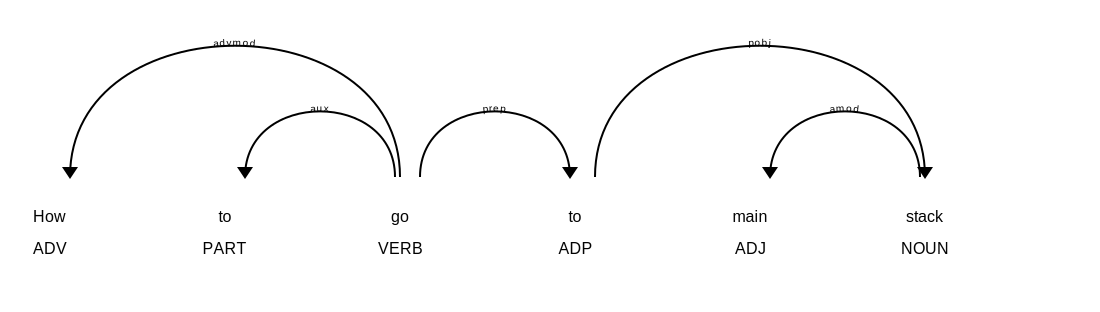

In [67]:
SVG(data = displacy.render(nlp("How to go to main stack")))

In [71]:
titles_with_go_string = [_ for _ in df.loc[lambda d: d['Title'].str.lower().str.contains("go")]['Title']]
titles_with_go_string[1:5]

['Good STL-like library for C',
 'My website got hacked... What should I do?',
 "DVCS Choices - What's good for Windows?",
 'Is a "Confirm Email" input good practice when user changes email address?']

In [80]:
def has_golang(doc):
    for t in doc:
        if t.lower_ in ["go","golang"]:
            if t.pos_ == "NOUN":
                return True 
    return False

In [ ]:
# Puede ser mejorado con https://spacy.io/usage/processing-pipelines/
g = (title for title in nlp.pipe(titles_with_go_string) if has_golang(title))
[next(g) for i in range(10)]

In [81]:
df_tags = pd.read_csv(tags_path)
go_ids = df_tags.loc[lambda d: d['Tag'] == 'go']['Id']

def has_go_token(doc):
    for t in doc:
        if t.lower_ in ['go', 'golang']:
            if t.pos_ != 'VERB':
                return True
    return False

all_go_sentences = df.loc[lambda d: d['Id'].isin(go_ids)]['Title'].tolist()
detectable = [d.text for d in nlp.pipe(all_go_sentences) if has_go_token(d)]

non_detectable = (df
                  .loc[lambda d: ~d['Id'].isin(go_ids)]
                  .loc[lambda d: d['Title'].str.lower().str.contains("go")]
                  ['Title']
                  .tolist())

non_detectable = [d.text for d in nlp.pipe(non_detectable) if has_go_token(d)]

len(all_go_sentences), len(detectable), len(non_detectable)

(1167, 589, 81)

In [84]:
model_name = "en_core_web_sm"
model = spacy.load(model_name, disable=["ner"])

def has_go_token(doc):
    for t in doc:
        if t.lower_ in ["go", "golang"]:
            if t.pos_ != "VERB":
                return True
    return False

method = "not-verb-but-pobj"

correct = sum(has_go_token(doc) for doc in model.pipe(detectable))
wrong = sum(has_go_token(doc) for doc in model.pipe(non_detectable))
precision = correct/(correct + wrong)
recall = correct/len(detectable)
accuracy = (correct + len(non_detectable) - wrong)/(len(detectable) + len(non_detectable))

f"{precision},{recall},{accuracy},{model_name},{method}" # this is logged

'0.8791044776119403,1.0,0.8791044776119403,en_core_web_sm,not-verb-but-pobj'

## Lectura adicional :

Spacy ofrece alrededor de 55 clases digitales de manipulacion de texto.

[Advanced NLP with spacy](https://course.spacy.io/en/)

[Diferencia entre NLP y TextMining](https://discuss.analyticsvidhya.com/t/difference-between-nlp-and-text-mining/2977)

[Tecnicas y metodos de TextMining Gaikwad et al](https://pdfs.semanticscholar.org/9fde/fcb2bd8f4781afcf8ceac02864d6bb76f357.pdf)